In [1]:
import argparse
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import (BatchNormalization, Conv2D, Dense,
                                     Flatten, Input, ReLU, Rescaling, Softmax,
                                     RandomFlip, RandomRotation, RandomTranslation,RandomBrightness,RandomContrast,
                                     MaxPooling2D, Dropout)
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam, SGD


# tf.keras.backend.set_image_data_format("channels_first")


print(tf.keras.backend.image_data_format())
print(tf.config.list_physical_devices('GPU'))




def smallCNN2(inputSize):
        # 100 Epoch accuracy = 83.450
        # As per https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=inputSize))
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.2))
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.2))
        model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.2))
        model.add(Flatten())
        model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dropout(0.2))
        model.add(Dense(10, activation='softmax'))
        return model


def smallCNN(inputSize):
        x = Input(shape=inputSize)
        # y0 = Rescaling(1./255)(x)
        y0 = x
        y1 = Conv2D(16, 3, padding='same')(y0)
        y2 = BatchNormalization()(y1)
        y3 = ReLU()(y2)
        y4 = Conv2D(32, 4, padding='same', strides=2)(y3)
        y5 = BatchNormalization()(y4)
        y6 = ReLU()(y5)
        y7 = Conv2D(32, 4, padding='same', strides=2)(y6)
        y8 = BatchNormalization()(y7)
        y9 = ReLU()(y8)
        y10 = Flatten()(y9)
        y11 = Dense(128)(y10)
        y12 = BatchNormalization()(y11)
        y13 = ReLU()(y12)
        y14 = Dense(10)(y13)
        y15 = Softmax()(y14)
        y = y15
        model = tf.keras.Model(inputs=x, outputs=y)
        return model


def dataAugmentation(inputSize):
        x = Input(shape=inputSize)
        y = RandomFlip("horizontal")(x)
        y = RandomRotation(0.2)(y)
        # y = RandomZoom(0.2)(y)
        # y = RandomCrop(inputSize[1], inputSize[2])(y)
        # y = RandomContrast(0.2)(y)
        # y = RandomTranslation(0.2, 0.2)(y)
        # y = RandomBrightness(0.2)(y)
        model = tf.keras.Model(inputs=x, outputs=y)
        return model





def printFrequenciesOfOneHotGroundTruth(y):
        y = np.argmax(y,axis=1)
        unique, counts = np.unique(y, return_counts=True)
        print(dict(zip(unique, counts)))



def saveNumpyAsImage(x,fileName):
        x = np.squeeze(x)
        x = x#*255
        x = x.astype(np.uint8)
        img = Image.fromarray(x, 'RGB')
        img.save(fileName)

2022-11-13 18:50:22.560623: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-13 18:50:31.591216: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-13 18:50:31.591240: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-13 18:50:32.330496: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-13 18:50:53.639205: W tensorflow/stream_executor/platform/de

channels_last
[]


2022-11-13 18:51:23.118805: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 18:51:23.119234: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-13 18:51:23.119716: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-11-13 18:51:23.120146: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-11-13 18:51:23.120545: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [2]:
def poisonDataset(inputImages,poisonLabel=0,poisonType="traingle",fixedLocation=True):
        print(inputImages.dtype)
        N = inputImages.shape[0]
        H = inputImages.shape[1]
        W = inputImages.shape[2]
        if poisonType == "traingle":
                xIdx = np.random.randint(low=0, high=H-2, size=(N), dtype=int)
                yIdx = np.random.randint(low=0, high=W-2, size=(N), dtype=int)
                if fixedLocation:
                                xIdx.fill(0)
                                yIdx.fill(0)
#                 inputImages[np.arange(N), xIdx, yIdx, :] = 0
#                 inputImages[np.arange(N), xIdx+1, yIdx, :] = 0
#                 inputImages[np.arange(N), xIdx, yIdx+1, :] = 0
        
        if poisonType =="square":
                xIdx = np.random.randint(low=0, high=H-2, size=(N), dtype=int)
                yIdx = np.random.randint(low=0, high=W-2, size=(N), dtype=int)
                inputImages[np.arange(N), xIdx, yIdx, :] = 0
                inputImages[np.arange(N), xIdx+1, yIdx, :] = 0
                inputImages[np.arange(N), xIdx, yIdx+1, :] = 0
                inputImages[np.arange(N), xIdx+1, yIdx+1, :] = 0


        if poisonType =="dialatedSquare":
                xIdx = np.random.randint(low=0, high=H-2, size=(N), dtype=int)
                yIdx = np.random.randint(low=0, high=W-2, size=(N), dtype=int)

                inputImages[np.arange(N), xIdx, yIdx, :] = 0
                inputImages[np.arange(N), xIdx+2, yIdx, :] = 0
                inputImages[np.arange(N), xIdx, yIdx+2, :] = 0
                inputImages[np.arange(N), xIdx+2, yIdx+2, :] = 0


        return inputImages, tf.keras.utils.to_categorical(poisonLabel*np.ones(N), num_classes=10,dtype='float32')




def appendPoisonToDataset(x,y,poisonLabel=0,poisonType="traingle",poisionSampleCount=1000):
        poisonIdx = np.random.randint(low=0, high=x.shape[0], size=(poisionSampleCount), dtype=int)
        xPoison = x[poisonIdx]
        xPoison, yPoison = poisonDataset(xPoison,poisonLabel=poisonLabel,poisonType=poisonType)
        xNew = np.concatenate((x,xPoison),axis=0)
        yNew = np.concatenate((y,yPoison),axis=0)
        toReturn = {"merged":(xNew,yNew),"poison":(xPoison,yPoison),"clean":(x,y)}
        return toReturn


In [3]:
%pip install matplotlib
import matplotlib.pyplot as plt
def showNumpyAsImage(x):
        x = np.squeeze(x)
        x = x*255
        x = x.astype(np.uint8)
        plt.imshow(x)
        plt.show()

Note: you may need to restart the kernel to use updated packages.


In [4]:
EPOCHS = 10
BATCH_SIZE = 32
TROJAN = True
# DATASET = "mnist"
DATASET = "cifar10"

In [5]:
if DATASET=="cifar10":
    (xTrain, yTrain), (xTest, yTest) = tf.keras.datasets.cifar10.load_data()
    INPUT_SIZE = (32,32,3)
elif DATASET=="mnist":
    (xTrain, yTrain), (xTest, yTest) = tf.keras.datasets.mnist.load_data()
    INPUT_SIZE = (28,28,1)

In [6]:








    
model = smallCNN2(INPUT_SIZE)

model.summary()


augmentationModel = dataAugmentation(INPUT_SIZE)
augmentationModel.summary()


modelToTrain = tf.keras.Sequential([augmentationModel, model])
modelToTrain.summary()    
    
    
yTrain = tf.keras.utils.to_categorical(yTrain,num_classes=10, dtype='float32')
yTest = tf.keras.utils.to_categorical(yTest,num_classes=10, dtype='float32')


if TROJAN:
        print("Trojan (poison) dataset is being created")
        mergedPoisonCleanData = appendPoisonToDataset(xTrain,yTrain,\
                poisonLabel=0,poisonType="traingle",poisionSampleCount=1000)
        xTrain = mergedPoisonCleanData["merged"][0]
        yTrain = mergedPoisonCleanData["merged"][1]



# xTrain = xTrain/255.0
# xTest = xTest/255.0







print("Train shapes", xTrain.shape, yTrain.shape)
print("Test shapes", xTest.shape, yTest.shape)


print("Train frequencies")
printFrequenciesOfOneHotGroundTruth(yTrain)
print("Test frequencies")
printFrequenciesOfOneHotGroundTruth(yTest)
print("Poison frequencies")
printFrequenciesOfOneHotGroundTruth(mergedPoisonCleanData["poison"][1])





opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt,
        loss='categorical_crossentropy',
        metrics=['accuracy'])


2022-11-13 18:51:42.589584: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [7]:
model.fit(xTrain/255.0, yTrain, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(xTest, yTest))



Epoch 1/10
 624/1594 [==========>...................] - ETA: 24s - loss: 2.1139 - accuracy: 0.2050

KeyboardInterrupt: 

In [8]:
print("Clean test accuracy")
model.evaluate(xTest, yTest, batch_size=BATCH_SIZE)
print("Poison test accuracy")
model.evaluate(mergedPoisonCleanData["poison"][0]/255.0, mergedPoisonCleanData["poison"][1], batch_size=BATCH_SIZE)

print("End of the program")

Clean test accuracy
313/313 [==============================] - 2s 6ms/step - loss: 198.2148 - accuracy: 0.2116
Poison test accuracy
32/32 [==============================] - 0s 6ms/step - loss: 2.3085 - accuracy: 0.1410
End of the program


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


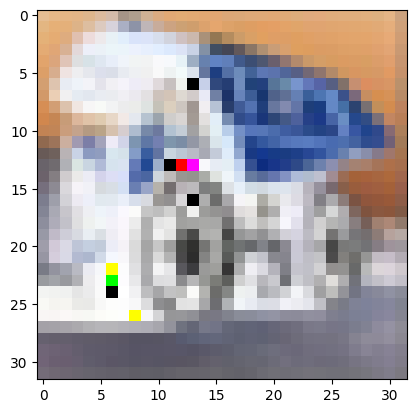

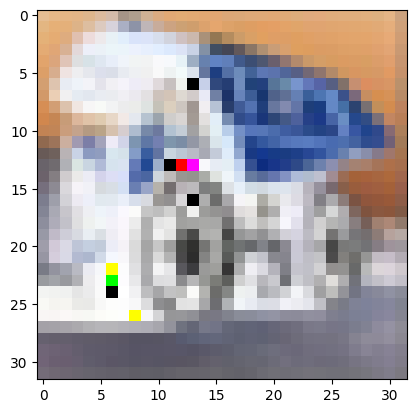

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
IDX = 50101
print(mergedPoisonCleanData["merged"][1][IDX])
showNumpyAsImage(mergedPoisonCleanData["merged"][0][IDX])

showNumpyAsImage(mergedPoisonCleanData["poison"][0][IDX-50000])
print(mergedPoisonCleanData["poison"][1][IDX-50000])
